In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use a teal color cycle for consistency in plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['teal'])

# Load the dataset (update the file path if needed)
file_path = 'Ovarian_patient_data.csv'
df = pd.read_csv(file_path)
print("Data loaded successfully. Shape:", df.shape)


Data loaded successfully. Shape: (200100, 34)


In [2]:
# Display basic information
print("Dataset Info:")
print(df.info())

# Display summary statistics (for all columns)
print("\nSummary Statistics:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200100 entries, 0 to 200099
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               200100 non-null  object 
 1   Age                     200100 non-null  float64
 2   BMI                     200100 non-null  float64
 3   Comorbidity             200100 non-null  int64  
 4   Symptom                 200100 non-null  int64  
 5   CA125                   200100 non-null  float64
 6   CancerStage             200100 non-null  int64  
 7   Histopathology          200100 non-null  object 
 8   PreviousTreatment       200100 non-null  int64  
 9   MenstrualHistory        200100 non-null  object 
 10  Ethnicity               200100 non-null  object 
 11  Smoking                 200100 non-null  int64  
 12  Alcohol                 200100 non-null  int64  
 13  Residence               200100 non-null  object 
 14  Socioe

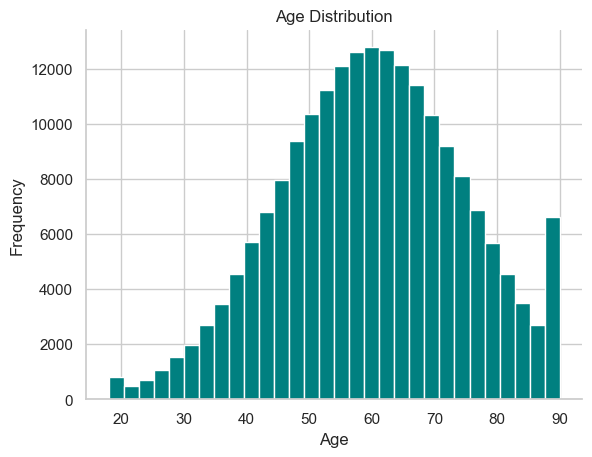

In [9]:
# Plot the distribution of age using teal color
if 'Age' in df.columns:
    plt.figure()
    plt.hist(df['Age'].dropna(), bins=30, color='teal')
    plt.xlabel("Age")
    plt.ylabel("Frequency")
    plt.title("Age Distribution")
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.show()
else:
    print("Column 'age' not found in the dataset.")


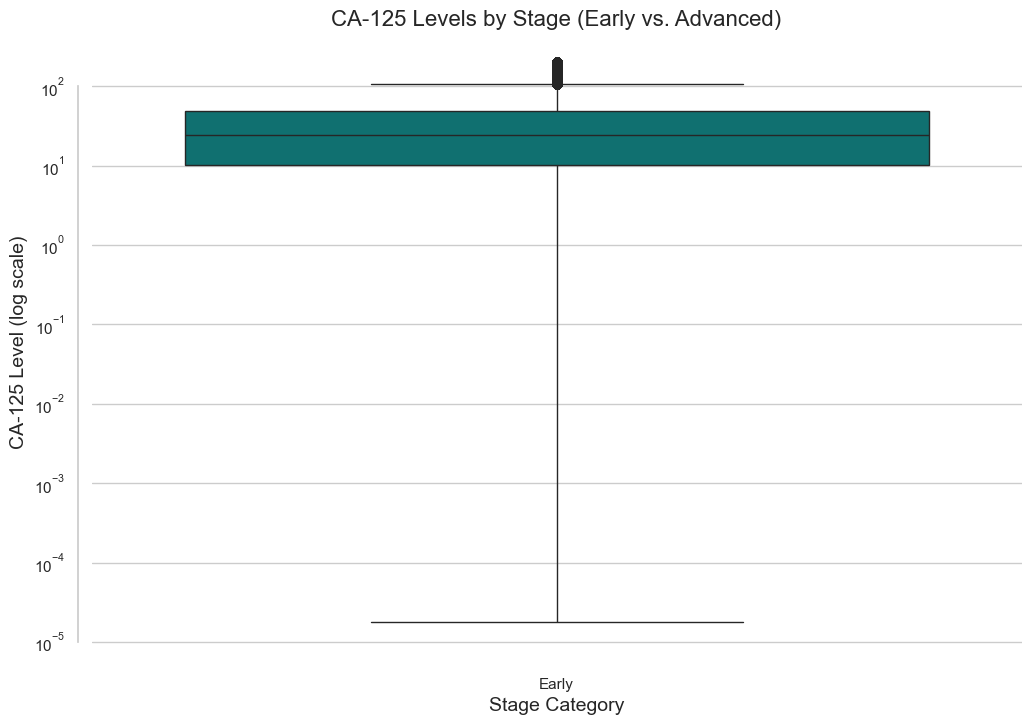

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure required columns exist
required_cols = ["CancerStage", "CA125"]
if all(col in df.columns for col in required_cols):

    # Classify stages into Early vs. Advanced
    def classify_stage(stage_str):
        stage_str = str(stage_str).upper()
        if "III" in stage_str or "IV" in stage_str:
            return "Advanced"
        return "Early"

    df["StageCategory"] = df["CancerStage"].apply(classify_stage)

    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    # Use log scale to handle very high CA-125 values
    ax = sns.boxplot(x="StageCategory", y="CA125", data=df, color='teal')
    plt.yscale("log")
    plt.title("CA-125 Levels by Stage (Early vs. Advanced)", fontsize=16)
    plt.xlabel("Stage Category", fontsize=14)
    plt.ylabel("CA-125 Level (log scale)", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(offset=10, trim=True)
    plt.show()
    

else:
    print("Required columns ('CancerStage', 'CA125') not found in the dataset.")

Correlation Matrix for Age, MenopauseAge, and CA-125:
                   Age  MenopauseAge     CA125
Age           1.000000     -0.004154 -0.000019
MenopauseAge -0.004154      1.000000 -0.002600
CA125        -0.000019     -0.002600  1.000000


Text(0.5, 1.0, 'Menopause Age Distribution')

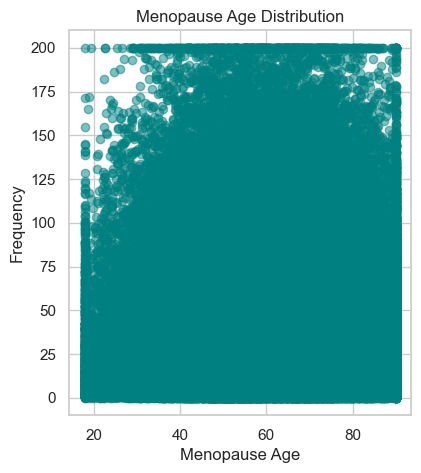

In [17]:
# Select relevant columns for analysis
relevant_cols = ['Age', 'MenopauseAge', 'CA125']

# Compute the correlation matrix for the selected columns
corr_matrix_relevant = df[relevant_cols].corr()

# Display the correlation matrix
print("Correlation Matrix for Age, MenopauseAge, and CA-125:")
print(corr_matrix_relevant)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(df['Age'], df['CA125'], color='teal', alpha=0.5)
plt.xlabel("Menopause Age")
plt.ylabel("Frequency")
plt.title("Menopause Age Distribution")




In [19]:
# Count the number of unique risk labels and their respective counts
risk_label_counts = df['RiskLabel'].value_counts()

# Display the counts
print("Number of Risk Labels and their respective counts:")
print(risk_label_counts)

Number of Risk Labels and their respective counts:
RiskLabel
0    119965
1     40092
2     30068
3      9975
Name: count, dtype: int64


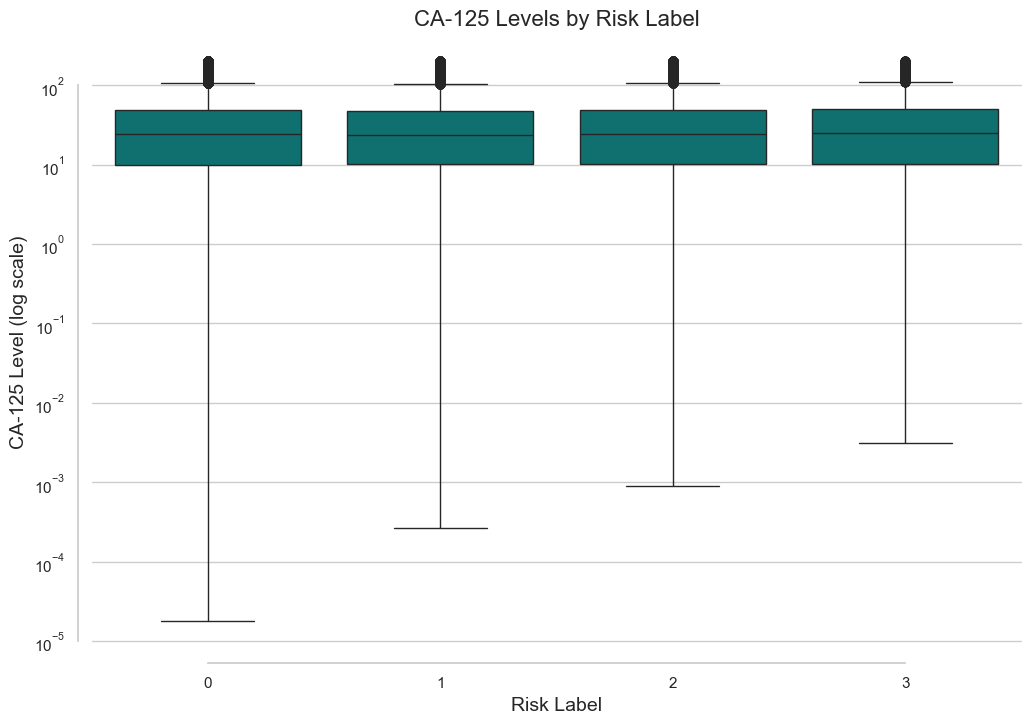

In [20]:
# Ensure required columns exist
if 'CA125' in df.columns and 'RiskLabel' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    ax = sns.boxplot(x='RiskLabel', y='CA125', data=df, color='teal')
    plt.yscale("log")
    plt.title("CA-125 Levels by Risk Label", fontsize=16)
    plt.xlabel("Risk Label", fontsize=14)
    plt.ylabel("CA-125 Level (log scale)", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(offset=10, trim=True)
    plt.show()
else:
    print("Required columns ('CA125', 'RiskLabel') not found in the dataset.")

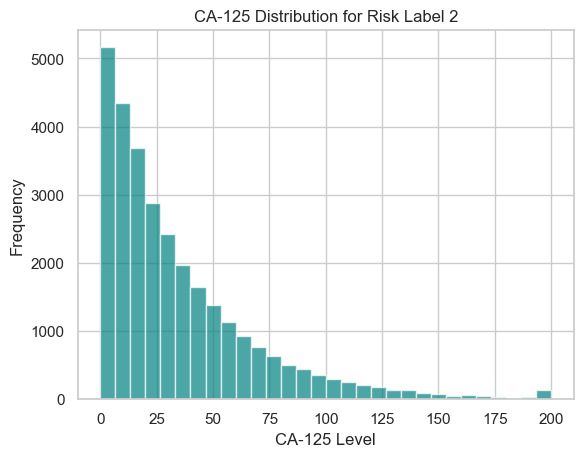

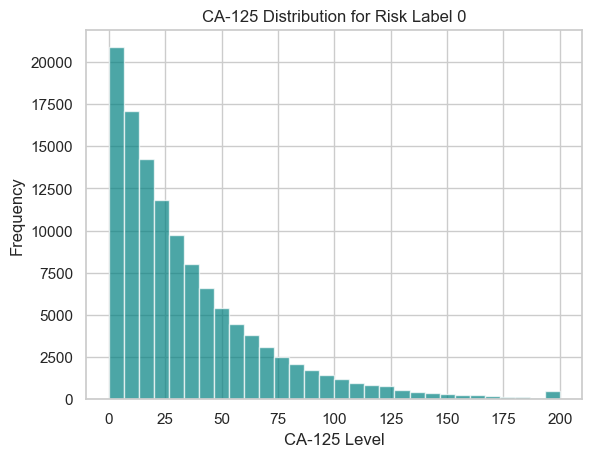

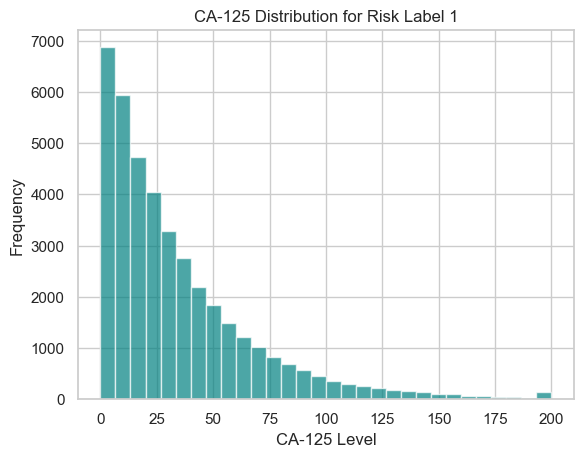

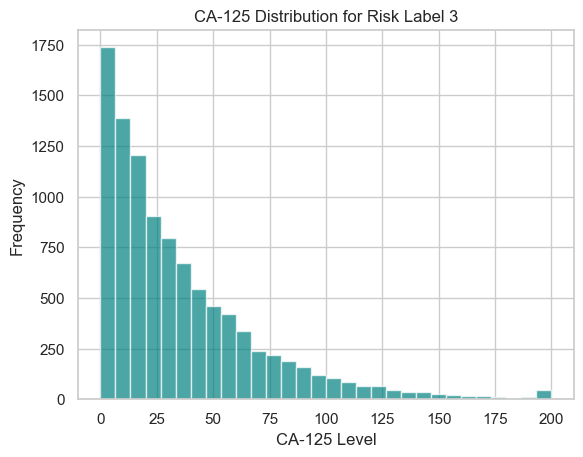

In [18]:
# Plot the distribution of CA-125 levels (assumed column name 'CA125') using teal color
if 'CA125' in df.columns:

    if 'RiskLabel' in df.columns:
        risk_labels = df['RiskLabel'].unique()
        for label in risk_labels:
            plt.figure()
            plt.hist(df[df['RiskLabel'] == label]['CA125'].dropna(), bins=30, color='teal', alpha=0.7)
            plt.xlabel("CA-125 Level")
            plt.ylabel("Frequency")
            plt.title(f"CA-125 Distribution for Risk Label {label}")
            plt.show()
    else:
        print("Column 'RiskLabel' not found in the dataset.")
    
else:
    print("Column 'CA125' not found in the dataset.")


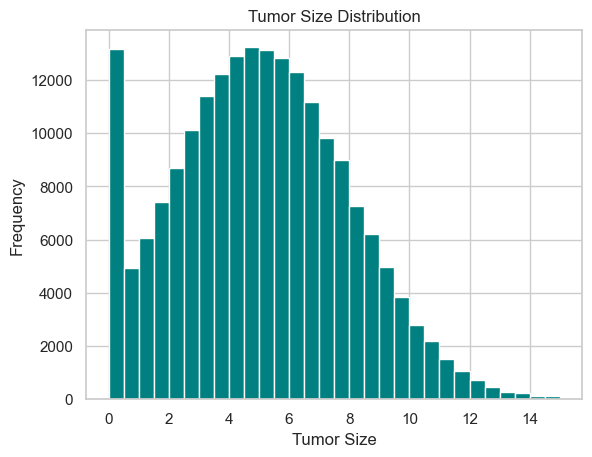

In [6]:
# Plot distribution for imaging-derived features such as tumor size and morphology score.
if 'TumorSize' in df.columns:
    plt.figure()
    plt.hist(df['TumorSize'].dropna(), bins=30, color='teal')
    plt.xlabel("Tumor Size")
    plt.ylabel("Frequency")
    plt.title("Tumor Size Distribution")
    plt.show()
else:
    print("Column 'tumor_size' not found in the dataset.")




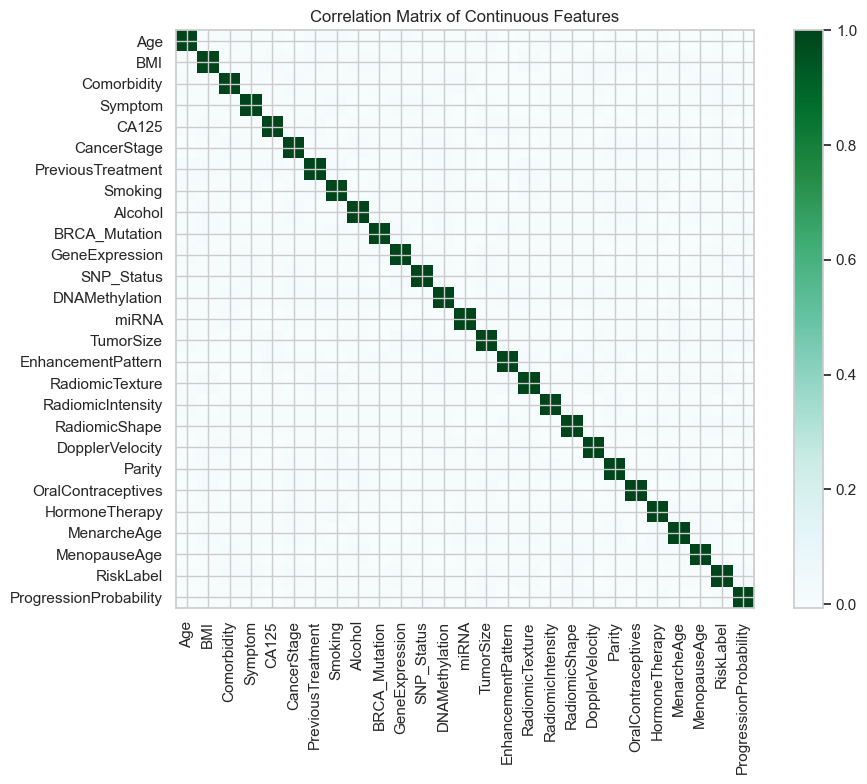

In [7]:
# Select numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[num_cols].corr()


plt.figure(figsize=(10, 8))
    
# Using a teal-themed colormap (BuGn) for the correlation matrix
plt.imshow(corr_matrix, cmap='BuGn', interpolation='none')
plt.colorbar()
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title("Correlation Matrix of Continuous Features")
plt.tight_layout()
plt.show()


In [8]:
# Scatter plot to assess relationship between age and CA-125 using teal color
if set(['Age', 'CA125']).issubset(df.columns):
    plt.figure()
    plt.scatter(df['age'], df['CA125'], color='teal', alpha=0.5)
    plt.xlabel("Age")
    plt.ylabel("CA-125 Level")
    plt.title("Scatter Plot: Age vs CA-125")
    plt.show()
else:
    print("Columns 'age' and/or 'CA125' not found in the dataset.")


KeyError: 'age'

<Figure size 640x480 with 0 Axes>

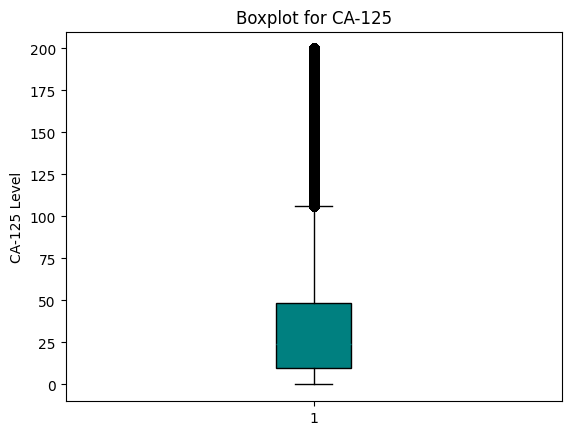

In [ ]:
# Define a function to create a boxplot with teal color
def teal_boxplot(data, ylabel, title):
    plt.figure()
    bp = plt.boxplot(data.dropna(), patch_artist=True)
    for patch in bp['boxes']:
        patch.set_facecolor('teal')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Boxplot for Age
if 'age' in df.columns:
    teal_boxplot(df['age'], "Age", "Boxplot for Age")

# Boxplot for CA-125
if 'CA125' in df.columns:
    teal_boxplot(df['CA125'], "CA-125 Level", "Boxplot for CA-125")

# Boxplot for Tumor Size
if 'tumor_size' in df.columns:
    teal_boxplot(df['tumor_size'], "Tumor Size", "Boxplot for Tumor Size")


Data completeness by category (%): {'vital_signs': None, 'lab_biomarkers': np.float64(100.0), 'imaging': None, 'genetic': None}


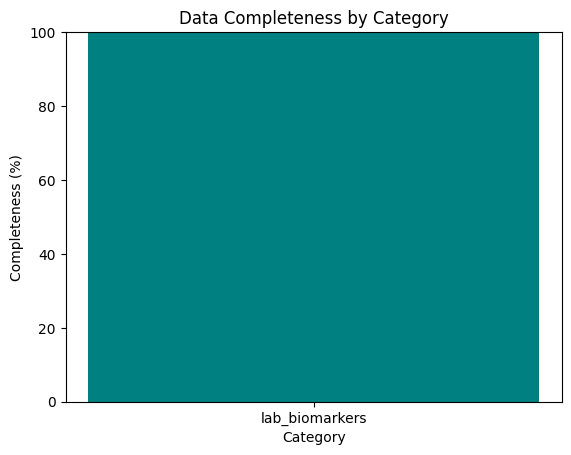

In [ ]:
# Define a dictionary mapping categories to their respective column names.
categories = {
    'vital_signs': ['heart_rate', 'blood_pressure', 'respiratory_rate', 'temperature'],
    'lab_biomarkers': ['CA125', 'HE4'],
    'imaging': ['tumor_size', 'morphology_score'],
    'genetic': ['BRCA1', 'BRCA2']
}

# Compute the completeness percentage for each category.
completeness = {}
for cat, cols in categories.items():
    available_cols = [col for col in cols if col in df.columns]
    if available_cols:
        completeness[cat] = df[available_cols].notnull().mean().mean() * 100
    else:
        completeness[cat] = None

print("Data completeness by category (%):", completeness)

# Filter out categories with missing definitions
categories_to_plot = {cat: comp for cat, comp in completeness.items() if comp is not None}

plt.figure()
plt.bar(list(categories_to_plot.keys()), list(categories_to_plot.values()), color='teal')
plt.xlabel("Category")
plt.ylabel("Completeness (%)")
plt.title("Data Completeness by Category")
plt.ylim(0, 100)
plt.show()


In [22]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Perform outlier analysis for each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outliers_dict = {}

for col in numeric_cols:
    outliers = detect_outliers(df, col)
    outliers_dict[col] = outliers
    print(f"Outliers in {col}:")
    count_outliers = len(outliers)
    percentage_outliers = (count_outliers / len(df)) * 100
    print(f"Count: {count_outliers}, Percentage: {percentage_outliers:.2f}%")
    print("\n")

# Optionally, you can store the outliers in a dictionary for further analysis

Outliers in Age:
Count: 701, Percentage: 0.35%


Outliers in BMI:
Count: 701, Percentage: 0.35%


Outliers in Comorbidity:
Count: 0, Percentage: 0.00%


Outliers in Symptom:
Count: 0, Percentage: 0.00%


Outliers in CA125:
Count: 9856, Percentage: 4.93%


Outliers in CancerStage:
Count: 0, Percentage: 0.00%


Outliers in PreviousTreatment:
Count: 39926, Percentage: 19.95%


Outliers in Smoking:
Count: 39985, Percentage: 19.98%


Outliers in Alcohol:
Count: 0, Percentage: 0.00%


Outliers in BRCA_Mutation:
Count: 30020, Percentage: 15.00%


Outliers in GeneExpression:
Count: 697, Percentage: 0.35%


Outliers in SNP_Status:
Count: 20006, Percentage: 10.00%


Outliers in DNAMethylation:
Count: 0, Percentage: 0.00%


Outliers in miRNA:
Count: 0, Percentage: 0.00%


Outliers in TumorSize:
Count: 675, Percentage: 0.34%


Outliers in EnhancementPattern:
Count: 0, Percentage: 0.00%


Outliers in RadiomicTexture:
Count: 9552, Percentage: 4.77%


Outliers in RadiomicIntensity:
Count: 1360, Perce